## **Problem Definition**

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np
import tensorflow as tf
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For high-level visualization with Plotly
import plotly.graph_objects as go  # For low-level customization with Plotly

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import torch
import torch.nn as nn

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/creditcard.xlsx')

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.describe

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 284807 rows and 31 columns.


In [ ]:
df.ndim

2

In [ ]:
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Display summary statistics
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Univariate Analysis**

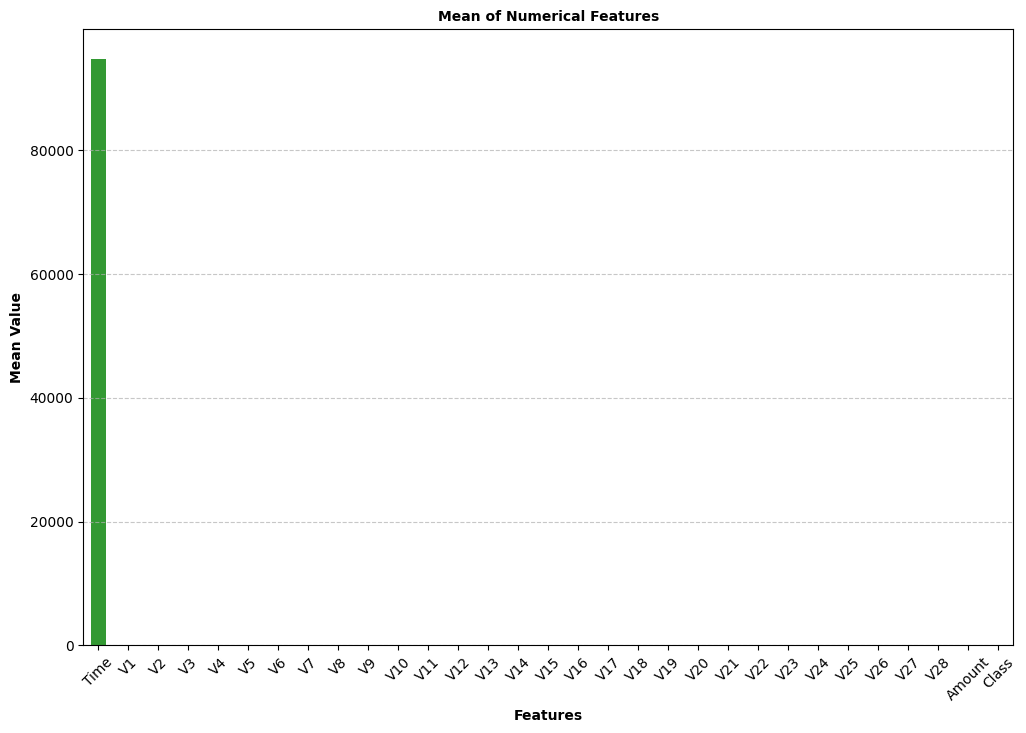

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the mean of each numerical column
numerical_means = df[numerical_cols].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
numerical_means.plot(kind='bar', color='green', alpha=0.8)
plt.title("Mean of Numerical Features", fontsize=10, fontweight='bold')
plt.ylabel("Mean Value", fontsize=10, fontweight='bold')
plt.xlabel("Features", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Categorical Features:

In [ ]:
# Count plots for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.show(10)


# **Bivariate Analysis**

In [ ]:
# Pairplot for numerical features and target variable
sns.pairplot(df, hue='Amount', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


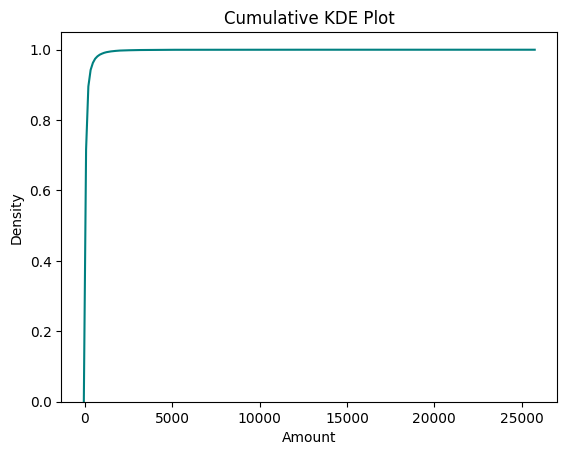

In [ ]:
sns.kdeplot(df['Amount'], cumulative=True, color='teal')
plt.title("Cumulative KDE Plot")
plt.show()


In [ ]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<Figure size 1500x1000 with 0 Axes>

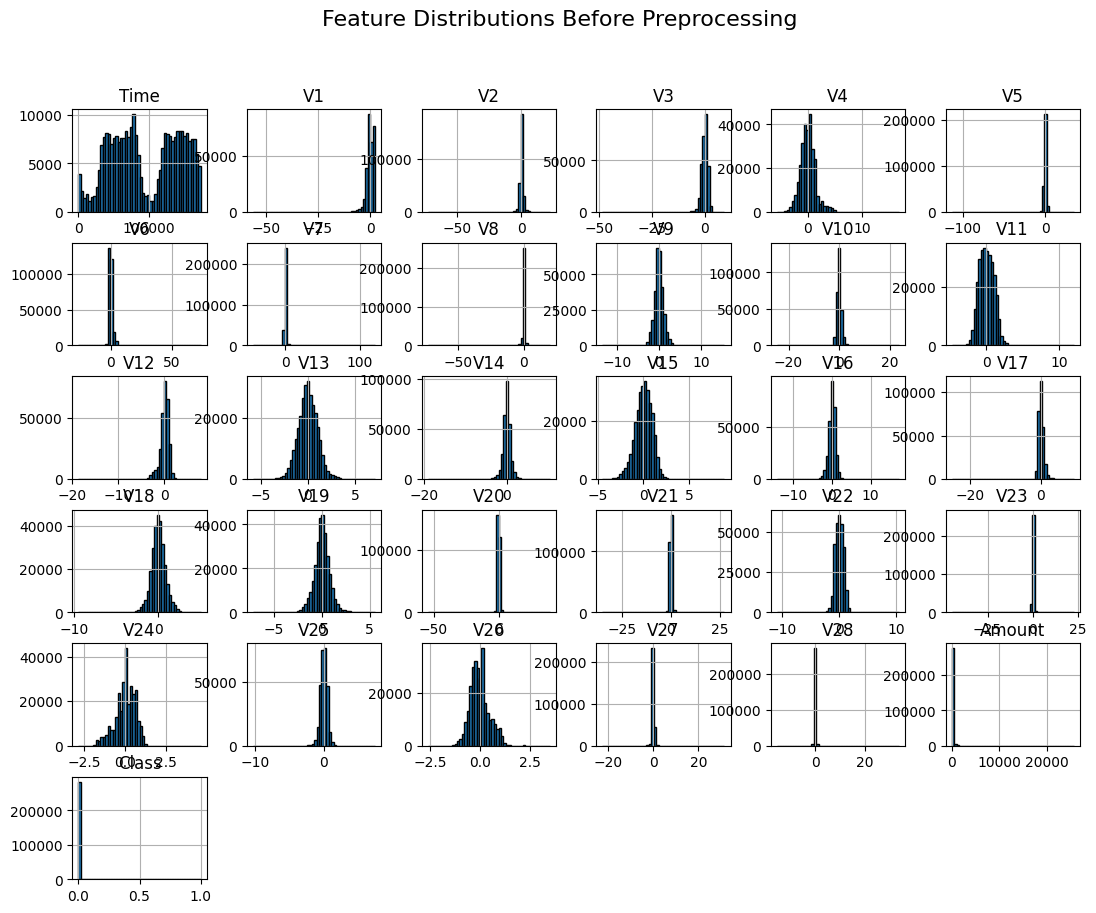

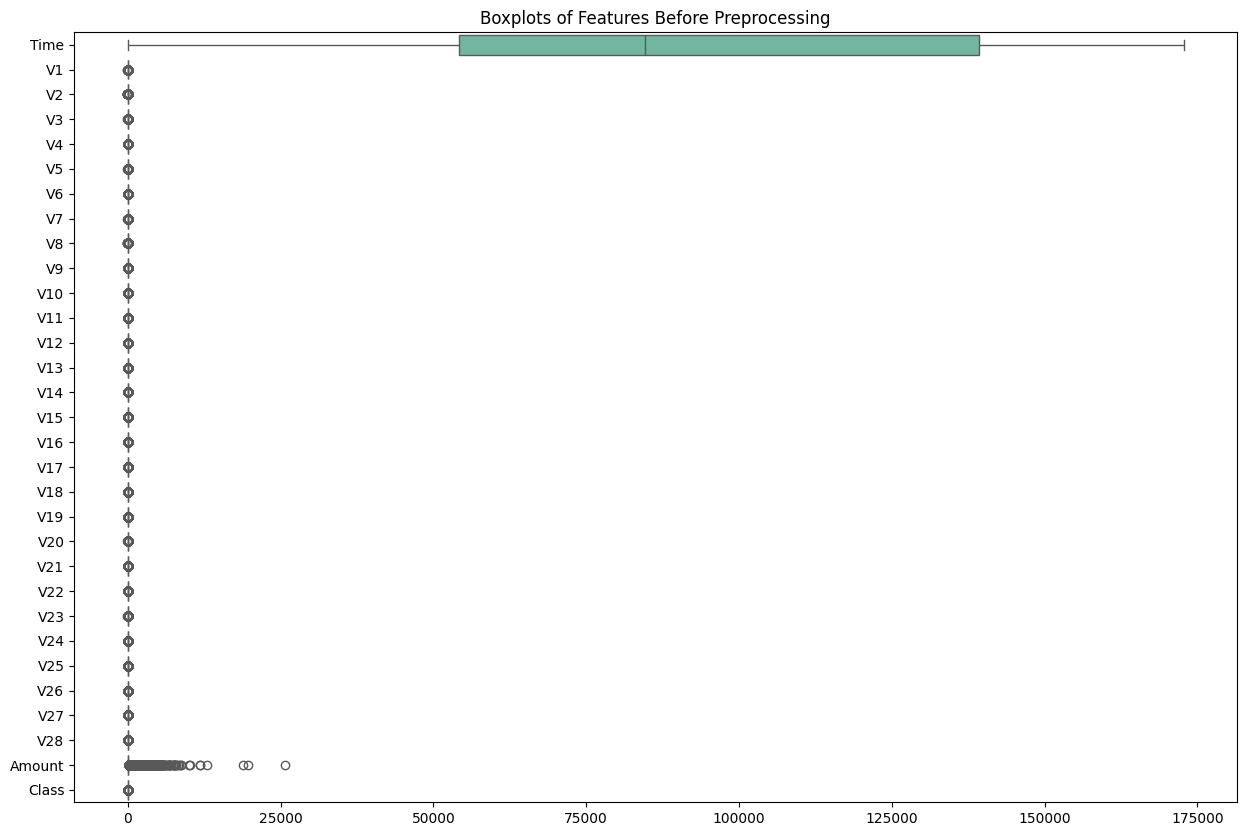

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.205498e-16 -2.406306e-15   
std    1.380247e+00  1

In [ ]:
# Set up figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical columns
df.hist(figsize=(15, 12), bins=50, edgecolor='black')
plt.suptitle("Feature Distributions Before Preprocessing", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features Before Preprocessing", fontsize=12)
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# **Data Preprocessing**

In [ ]:
features = df.drop(columns=["Class"])
labels = df["Class"]
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# **Reshape input for CNN**

In [ ]:
X_train = X_train.reshape(-1, 6, 6, 1)  # Assuming 6x6 input as optimized in PMA
X_test = X_test.reshape(-1, 6, 6, 1)


# **Model Building And Performance Testing**

Iteration 0/50, Best score: 0.725914
Iteration 10/50, Best score: 0.725915
Iteration 20/50, Best score: 0.725915
Iteration 30/50, Best score: 0.725915
Iteration 40/50, Best score: 0.725915

Performance Metrics:
Accuracy: 0.9900
Precision: 0.8750
Recall: 1.0000
F1 Score: 0.9333


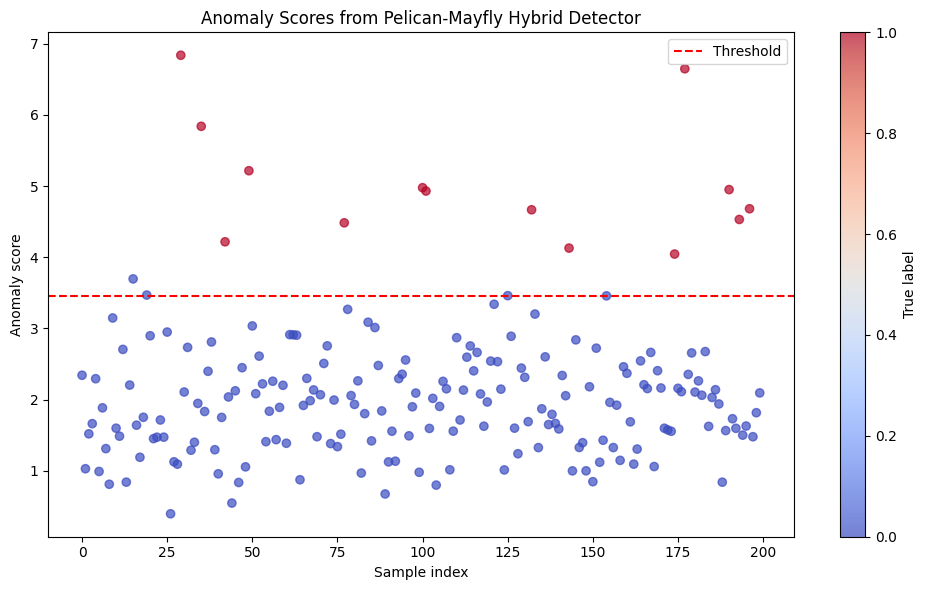

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score

class PelicanMayflyHybridDetector:
    """
    Anomaly detection algorithm using hybridized Pelican and Mayfly optimization.

    This implementation combines the exploitation capabilities of the Pelican
    Optimization Algorithm with the exploration strengths of the Mayfly
    Optimization Algorithm for effective anomaly detection.
    """

    def __init__(self, n_particles=50, max_iterations=100, alpha=0.6, beta=0.4,
                 c1=1.5, c2=1.5, w=0.7, w_min=0.4, decay_factor=0.97):
        """
        Initialize the hybrid detector with optimization parameters.

        Parameters:
        -----------
        n_particles : int
            Number of particles in the swarm
        max_iterations : int
            Maximum number of iterations for optimization
        alpha : float
            Weight for the Pelican component
        beta : float
            Weight for the Mayfly component
        c1 : float
            Cognitive parameter (personal best attraction)
        c2 : float
            Social parameter (global best attraction)
        w : float
            Initial inertia weight
        w_min : float
            Minimum inertia weight
        decay_factor : float
            Decay rate for adaptive parameters
        """
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        self.alpha = alpha
        self.beta = beta
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.w_min = w_min
        self.decay_factor = decay_factor

        # Will be initialized during fitting
        self.positions = None
        self.velocities = None
        self.personal_best_pos = None
        self.personal_best_score = None
        self.global_best_pos = None
        self.global_best_score = np.inf
        self.dimensions = None
        self.covariance_matrix = None
        self.mean_vector = None
        self.threshold = None

    def objective_function(self, X, data):
        """
        Calculate the objective function (fitness) for given positions.
        For anomaly detection, we maximize the Mahalanobis distance between
        normal and anomalous samples.

        Parameters:
        -----------
        X : ndarray
            Particle positions representing the feature weights
        data : ndarray
            The training data

        Returns:
        --------
        float
            Fitness value (negative for maximization)
        """
        # Apply feature weights
        weighted_data = data * X

        # Calculate covariance matrix and mean vector
        cov_matrix = np.cov(weighted_data, rowvar=False)
        mean_vec = np.mean(weighted_data, axis=0)

        # Add small value to diagonal to ensure matrix is invertible
        cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6

        # Calculate distances
        inv_cov = np.linalg.inv(cov_matrix)
        distances = []

        for sample in weighted_data:
            diff = sample - mean_vec
            distance = np.sqrt(diff.dot(inv_cov).dot(diff.T))
            distances.append(distance)

        # Variance of distances (higher variance = better separation)
        variance = np.var(distances)

        # Return negative because we want to maximize
        return -variance

    def initialize_swarm(self, dimensions):
        """
        Initialize the particle swarm with random positions and velocities.

        Parameters:
        -----------
        dimensions : int
            Number of dimensions (features)
        """
        self.dimensions = dimensions

        # Initialize positions (between 0 and 1 for feature weights)
        self.positions = np.random.uniform(0, 1, (self.n_particles, dimensions))

        # Initialize velocities
        self.velocities = np.random.uniform(-0.1, 0.1, (self.n_particles, dimensions))

        # Initialize personal best
        self.personal_best_pos = self.positions.copy()
        self.personal_best_score = np.full(self.n_particles, np.inf)

    def update_pelican_component(self, particle_idx, local_best_idx):
        """
        Calculate the Pelican component for position update.

        Parameters:
        -----------
        particle_idx : int
            Index of the current particle
        local_best_idx : int
            Index of the local best particle

        Returns:
        --------
        ndarray
            Pelican component vector
        """
        r1 = np.random.random()
        r2 = np.random.random()

        global_component = r1 * (self.global_best_pos - self.positions[particle_idx])

        # Use local best if available, otherwise use global best again
        if local_best_idx is not None:
            local_component = r2 * (self.personal_best_pos[local_best_idx] - self.positions[particle_idx])
        else:
            local_component = r2 * (self.global_best_pos - self.positions[particle_idx])

        return global_component + local_component

    def update_mayfly_component(self, particle_idx):
        """
        Calculate the Mayfly component for position update.

        Parameters:
        -----------
        particle_idx : int
            Index of the current particle

        Returns:
        --------
        ndarray
            Mayfly component vector
        """
        r3 = np.random.random()
        r4 = np.random.random()

        inertia = self.w * self.velocities[particle_idx]
        cognitive = self.c1 * r3 * (self.personal_best_pos[particle_idx] - self.positions[particle_idx])
        social = self.c2 * r4 * (self.global_best_pos - self.positions[particle_idx])

        return inertia + cognitive + social

    def get_local_best(self, particle_idx, k=3):
        """
        Find the local best particle among k nearest neighbors.

        Parameters:
        -----------
        particle_idx : int
            Index of the current particle
        k : int
            Number of neighbors to consider

        Returns:
        --------
        int or None
            Index of the local best particle, or None if not found
        """
        if self.n_particles <= k:
            return np.argmin(self.personal_best_score)

        # Calculate distances to other particles
        current_pos = self.positions[particle_idx]
        distances = [np.linalg.norm(current_pos - self.positions[i])
                     for i in range(self.n_particles) if i != particle_idx]
        indices = [i for i in range(self.n_particles) if i != particle_idx]

        # Sort by distance
        sorted_indices = [indices[i] for i in np.argsort(distances)[:k]]

        # Find best neighbor
        best_score = np.inf
        best_idx = None

        for idx in sorted_indices:
            if self.personal_best_score[idx] < best_score:
                best_score = self.personal_best_score[idx]
                best_idx = idx

        return best_idx

    def update_particles(self):
        """
        Update all particles' positions and velocities.
        """
        for i in range(self.n_particles):
            # Get local best
            local_best_idx = self.get_local_best(i)

            # Calculate Pelican component
            pelican_component = self.update_pelican_component(i, local_best_idx)

            # Calculate Mayfly component
            mayfly_component = self.update_mayfly_component(i)

            # Update velocity (for Mayfly component)
            self.velocities[i] = mayfly_component

            # Combine components for position update
            self.positions[i] = self.positions[i] + self.alpha * pelican_component + self.beta * mayfly_component

            # Ensure positions stay within bounds [0, 1]
            self.positions[i] = np.clip(self.positions[i], 0, 1)

    def fit(self, X):
        """
        Fit the detector to the training data.

        Parameters:
        -----------
        X : ndarray
            Training data

        Returns:
        --------
        self : object
            Returns self
        """
        # Initialize the swarm
        self.initialize_swarm(X.shape[1])

        # Optimization loop
        for iteration in range(self.max_iterations):
            # Evaluate each particle
            for i in range(self.n_particles):
                score = self.objective_function(self.positions[i], X)

                # Update personal best
                if score < self.personal_best_score[i]:
                    self.personal_best_score[i] = score
                    self.personal_best_pos[i] = self.positions[i].copy()

                    # Update global best
                    if score < self.global_best_score:
                        self.global_best_score = score
                        self.global_best_pos = self.positions[i].copy()

            # Update particles
            self.update_particles()

            # Update inertia weight
            self.w = max(self.w_min, self.w * self.decay_factor)

            # Print progress every 10 iterations
            if iteration % 10 == 0:
                print(f"Iteration {iteration}/{self.max_iterations}, Best score: {-self.global_best_score:.6f}")

        # Calculate final model parameters using optimal weights
        weighted_data = X * self.global_best_pos
        self.covariance_matrix = np.cov(weighted_data, rowvar=False)
        self.mean_vector = np.mean(weighted_data, axis=0)

        # Add small value to diagonal to ensure matrix is invertible
        self.covariance_matrix += np.eye(self.covariance_matrix.shape[0]) * 1e-6

        # Calculate threshold based on training data
        scores = self.decision_function(X)
        self.threshold = np.percentile(scores, 95)  # Set threshold at 95th percentile

        return self

    def decision_function(self, X):
        """
        Calculate anomaly scores for given samples.

        Parameters:
        -----------
        X : ndarray
            Samples to score

        Returns:
        --------
        ndarray
            Anomaly scores
        """
        # Apply feature weights
        weighted_X = X * self.global_best_pos

        # Calculate inverse covariance matrix
        inv_cov = np.linalg.inv(self.covariance_matrix)

        # Calculate Mahalanobis distance for each sample
        scores = []
        for sample in weighted_X:
            diff = sample - self.mean_vector
            score = np.sqrt(diff.dot(inv_cov).dot(diff.T))
            scores.append(score)

        return np.array(scores)

    def predict(self, X):
        """
        Predict if samples are anomalies.

        Parameters:
        -----------
        X : ndarray
            Samples to predict

        Returns:
        --------
        ndarray
            Binary predictions (1 for anomaly, 0 for normal)
        """
        scores = self.decision_function(X)
        return (scores > self.threshold).astype(int)


# Example usage of the algorithm
def run_example():
    # Create a synthetic dataset with anomalies
    np.random.seed(42)

    # Generate normal data
    normal_data = np.random.multivariate_normal(
        mean=[0, 0, 0, 0, 0],
        cov=np.diag([1, 1, 1, 1, 1]),
        size=950
    )

    # Generate anomalies
    anomalies = np.random.multivariate_normal(
        mean=[3, 3, 3, 3, 3],
        cov=np.diag([2, 2, 2, 2, 2]),
        size=50
    )

    # Combine data and create labels
    X = np.vstack([normal_data, anomalies])
    y = np.hstack([np.zeros(950), np.ones(50)])

    # Shuffle the data
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the detector
    detector = PelicanMayflyHybridDetector(n_particles=30, max_iterations=50)
    detector.fit(X_train)

    # Make predictions
    y_pred = detector.predict(X_test)

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)

    print("\nPerformance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Visualize results (for 2D projection)
    scores = detector.decision_function(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(X_test)), scores, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.axhline(y=detector.threshold, color='r', linestyle='--', label='Threshold')
    plt.colorbar(label='True label')
    plt.xlabel('Sample index')
    plt.ylabel('Anomaly score')
    plt.title('Anomaly Scores from Pelican-Mayfly Hybrid Detector')
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_example()